<a href="https://colab.research.google.com/github/BughYBuggY/Supermarket/blob/main/234312017_MBugraGurdrama_MachineLearningFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report, f1_score, mean_squared_error, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier



# Veri setini yükleme ve hazırlama
file_path = "/content/dataset ml final.txt"  # Veri setinin yolu
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']  # Sütun isimleri
data = pd.read_csv(file_path, header=None, delimiter='\t', names=columns)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Min-Max normalizasyonu uygulama
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop('Outcome', axis=1)), columns=data.columns[:-1])

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['Outcome'], test_size=0.3, random_state=42)


NAİVE BAYES

Doğruluk (Naive Bayes): 0.74
Duyarlılık: 0.6625
Özgüllük: 0.7880794701986755

Sınıflandırma Raporu (Naive Bayes):
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231


Confusion Matrix (Naive Bayes):
[[119  32]
 [ 27  53]]


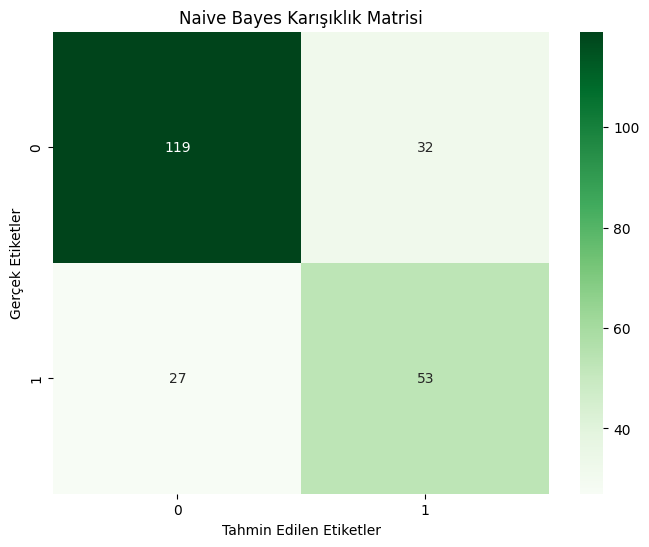

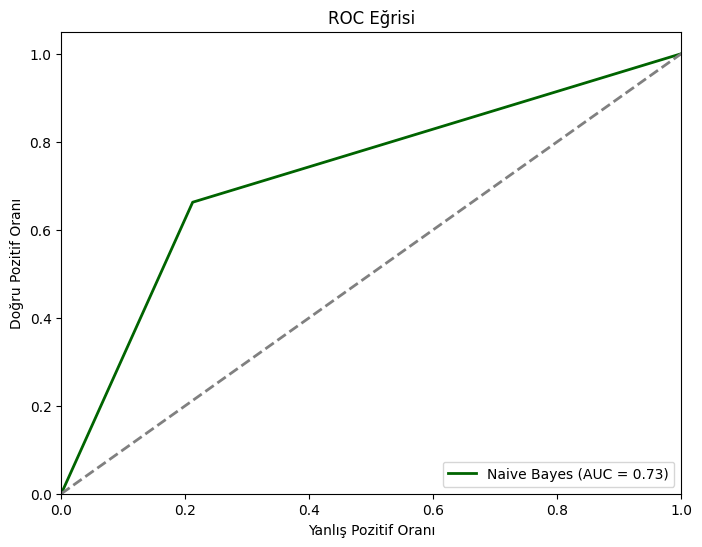

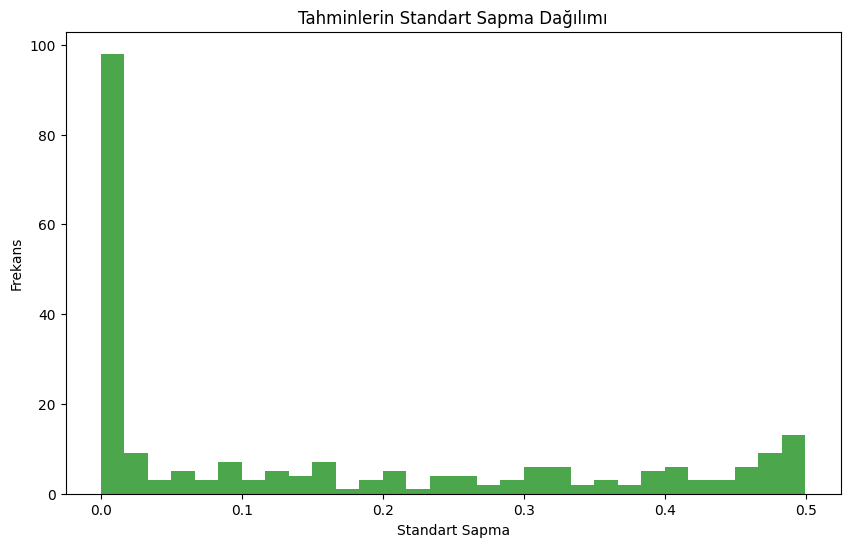

In [ ]:
# Naive Bayes Sınıflandırıcı

# Naive Bayes modeli ile tahminler yapma
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# Naive Bayes için duyarlılık, özgüllük ve doğruluk hesaplama
tn_nb, fp_nb, fn_nb, tp_nb = confusion_matrix(y_test, nb_predictions).ravel()
sensitivity_nb = tp_nb / (tp_nb + fn_nb)
specificity_nb = tn_nb / (tn_nb + fp_nb)

# Confusion Matrix ve ROC eğrisi için
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_predictions)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Naive Bayes sınıflandırıcısı için performans ölçümlerini hesaplama
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_classification_report = classification_report(y_test, nb_predictions)
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)

# Naive Bayes sınıflandırıcısı için performans ölçümlerini yazdırma
print(f"Doğruluk (Naive Bayes): {nb_accuracy:.2f}")
print("Duyarlılık:", sensitivity_nb)
print("Özgüllük:", specificity_nb)
print("\nSınıflandırma Raporu (Naive Bayes):")
print(nb_classification_report)
print("\nConfusion Matrix (Naive Bayes):")
print(nb_confusion_matrix)

# Naive Bayes sınıflandırıcısı için bir karışıklık matrisi çizme
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Naive Bayes Karışıklık Matrisi')
plt.show()

# ROC Eğrisi çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkgreen', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

# Bootstrap yöntemi ile tahminlerin standart sapmasını hesapla
def bootstrap_std(X, y, model, n_iterations=1000):
    predictions = []
    for _ in range(n_iterations):
        # Veri setini örneklemle
        X_sample, y_sample = resample(X, y)
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X)
        predictions.append(y_pred)

    # Tahminlerin standart sapmasını hesapla
    predictions = np.array(predictions)
    std_dev = np.std(predictions, axis=0)
    return std_dev

# Model ve veri seti ile fonksiyonu çağır
std_dev = bootstrap_std(X_test, y_test, nb_classifier)

# Standart sapmayı çizdir
plt.figure(figsize=(10, 6))
plt.hist(std_dev, bins=30, color='green', alpha=0.7)
plt.title('Tahminlerin Standart Sapma Dağılımı')
plt.xlabel('Standart Sapma')
plt.ylabel('Frekans')
plt.show()

KNN


k = 4 için 10 adımda ortalama sonuçlar:
Doğruluk: 0.70
Ortalama Kare Hata: 0.30
Ortalama ROC AUC: 0.74
Sınıflandırma Raporu (KNN):
              precision  recall  f1-score  support
0                  0.72    0.88      0.79    151.0
1                  0.61    0.35      0.44     80.0
accuracy           0.70    0.70      0.70      0.7
macro avg          0.66    0.62      0.62    231.0
weighted avg       0.68    0.70      0.67    231.0
Confusion Matrix:
[[133.  18.]
 [ 52.  28.]]

k = 6 için 10 adımda ortalama sonuçlar:
Doğruluk: 0.67
Ortalama Kare Hata: 0.33
Ortalama ROC AUC: 0.73
Sınıflandırma Raporu (KNN):
              precision  recall  f1-score  support
0                  0.71    0.82      0.76   151.00
1                  0.53    0.38      0.44    80.00
accuracy           0.67    0.67      0.67     0.67
macro avg          0.62    0.60      0.60   231.00
weighted avg       0.65    0.67      0.65   231.00
Confusion Matrix:
[[124.  27.]
 [ 50.  30.]]

k = 8 için 10 adımda ortalama son

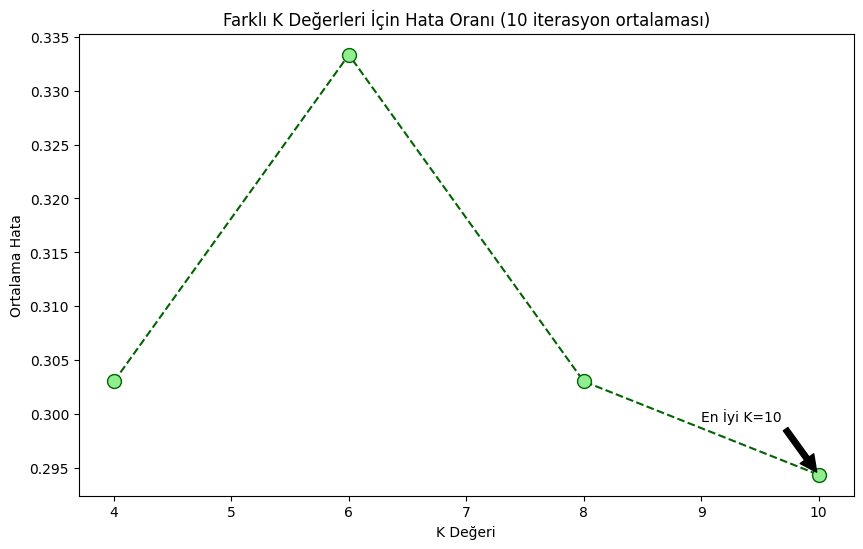

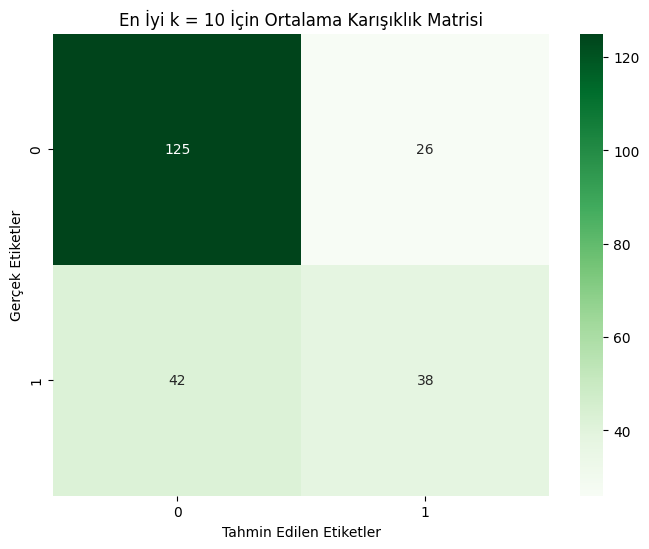

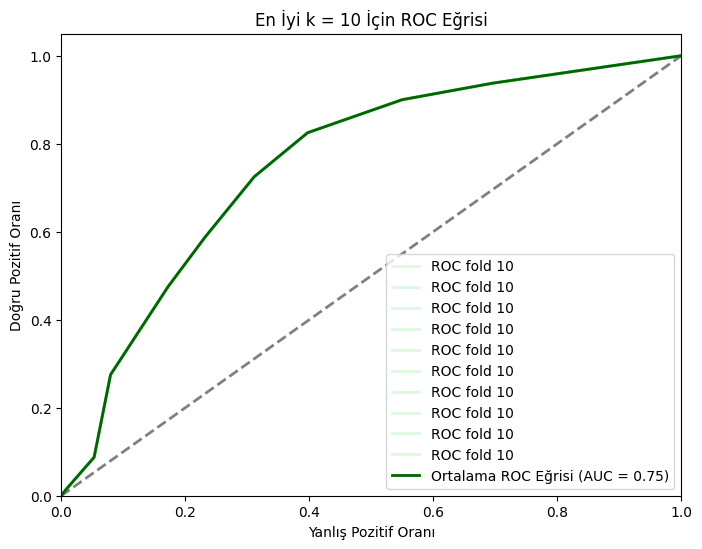

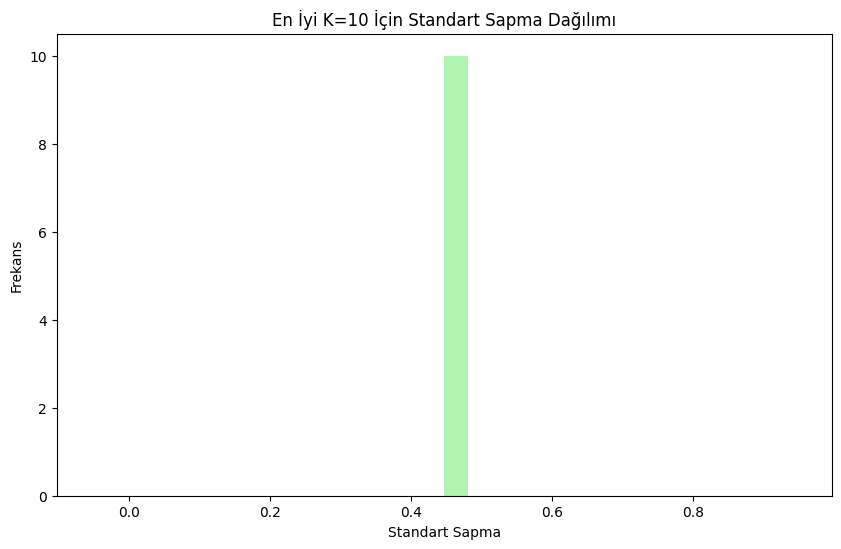

In [ ]:

# KNN (K-Nearest Neighbors)

# K değerleri
k_values = [4, 6, 8, 10]
best_k = None
best_accuracy = 0
best_std_devs = None
best_auc_score = 0
mean_errors = []
best_fpr = None
best_tpr = None

for k in k_values:
    print(f"\nk = {k} için 10 adımda ortalama sonuçlar:")

    # Sonuçları depolamak için boş listeler
    acc_scores = []
    confusion_matrices = []
    std_devs = []
    reports = []
    auc_scores = []
    fprs = []
    tprs = []

    for _ in range(10):  # Her bir k değeri için 10 kez çalıştırma
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        knn_predictions = knn.predict(X_test)
        probs = knn.predict_proba(X_test)[:, 1]  # Sınıf olasılıklarını al
        reports.append(classification_report(y_test, knn_predictions, output_dict=True))

        # Doğruluğu hesapla
        acc_k = accuracy_score(y_test, knn_predictions)
        acc_scores.append(acc_k)

        # Confusion Matrix hesapla
        confusion_matrix_k = confusion_matrix(y_test, knn_predictions)
        confusion_matrices.append(confusion_matrix_k)

        # Standart sapmayı hesapla
        std_dev_k = np.std(knn_predictions)
        std_devs.append(std_dev_k)

        # ROC AUC ve ROC eğrisi değerlerini hesaplama
        fpr, tpr, _ = roc_curve(y_test, probs)
        fprs.append(fpr)
        tprs.append(tpr)
        auc_k = roc_auc_score(y_test, probs)
        auc_scores.append(auc_k)

    # Ortalama sonuçları yazdır
    mean_acc = np.mean(acc_scores)
    if not np.isnan(mean_acc):  # Eğer ortalama doğruluk değeri NaN değilse devam et
        mean_errors.append(1 - mean_acc)
        print(f"Doğruluk: {mean_acc:.2f}")
        print(f"Ortalama Kare Hata: {mean_squared_error(y_test, knn_predictions):.2f}")
        print(f"Ortalama ROC AUC: {np.mean(auc_scores):.2f}")

        # En iyi k değerini güncelle
        if mean_acc > best_accuracy:
            best_accuracy = mean_acc
            best_k = k
            best_std_devs = std_devs
            best_auc_score = np.mean(auc_scores)
            best_fpr = np.mean(fprs, axis=0)
            best_tpr = np.mean(tprs, axis=0)

        # Reportların DataFrame olarak birleştirilmesi ve ortalamalarının alınması
        df = pd.DataFrame()
        for report in reports:
            temp_df = pd.DataFrame(report).transpose()
            df = pd.concat([df, temp_df], axis=0)

        mean_df = df.groupby(df.index).mean()
        print("Sınıflandırma Raporu (KNN):")
        print(mean_df[['precision', 'recall', 'f1-score', 'support']].round(2).to_string())

        # Ortalama Confusion Matrix yazdır
        mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
        print(f"Confusion Matrix:\n{mean_confusion_matrix}")

# En iyi k değeri ve en yüksek doğruluk
print(f"En iyi k değeri: {best_k}, En yüksek doğruluk: {best_accuracy:.2f}")
print()

# En iyi K değeri için hata oranları grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_errors, color='darkgreen', linestyle='dashed', marker='o', markerfacecolor='lightgreen', markersize=10)
plt.title('Farklı K Değerleri İçin Hata Oranı (10 iterasyon ortalaması)')
plt.xlabel('K Değeri')
plt.ylabel('Ortalama Hata')
plt.annotate(f'En İyi K={best_k}', xy=(best_k, 1 - best_accuracy),
             xytext=(best_k-1, 1 - best_accuracy + 0.005), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# En iyi k için Confusion Matrix grafiği
plt.figure(figsize=(8, 6))
sns.heatmap(mean_confusion_matrix.astype(int), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('En İyi k = ' + str(best_k) + ' İçin Ortalama Karışıklık Matrisi')
plt.show()

# En iyi k için ROC Eğrisi grafiği
plt.figure(figsize=(8, 6))
for fpr, tpr in zip(fprs, tprs):
    plt.plot(fpr, tpr, lw=2, alpha=0.3, color='lightgreen', label='ROC fold {}'.format(k))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.plot(best_fpr, best_tpr, color='darkgreen', lw=2, label=f'Ortalama ROC Eğrisi (AUC = {best_auc_score:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('En İyi k = ' + str(best_k) + ' İçin ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

# En iyi k için Standart Sapma grafiği
plt.figure(figsize=(10, 6))
plt.hist(best_std_devs, bins=30, color='lightgreen', alpha=0.7)
plt.title(f'En İyi K={best_k} İçin Standart Sapma Dağılımı')
plt.xlabel('Standart Sapma')
plt.ylabel('Frekans')
plt.show()

MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


En İyi Model Parametreleri: {'hidden_layers': (8,), 'activation': 'tanh', 'learning_rate': 0.1, 'batch_size': 16}
Train Doğruluğu: 0.80
Test Doğruluğu: 0.78
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.61      0.64        80

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.76       231

Ortalama Kare Hata: 0.24
Confusion Matrix:
[[126  25]
 [ 31  49]]


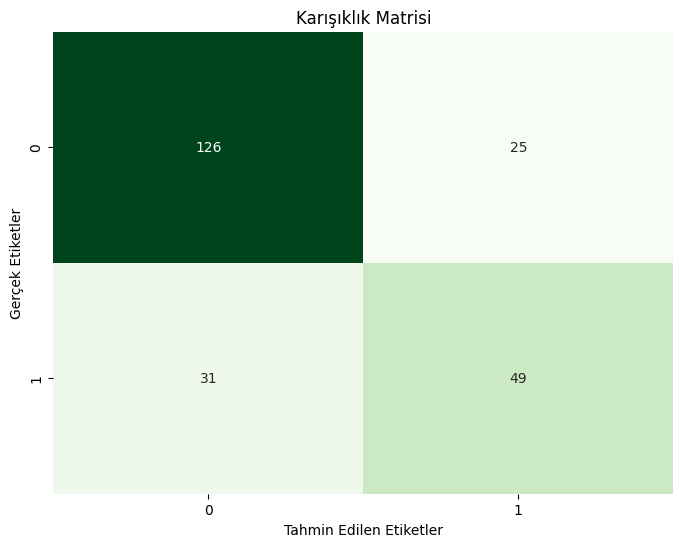

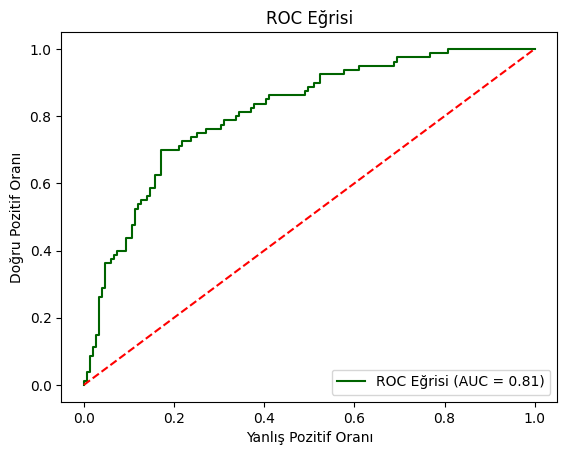

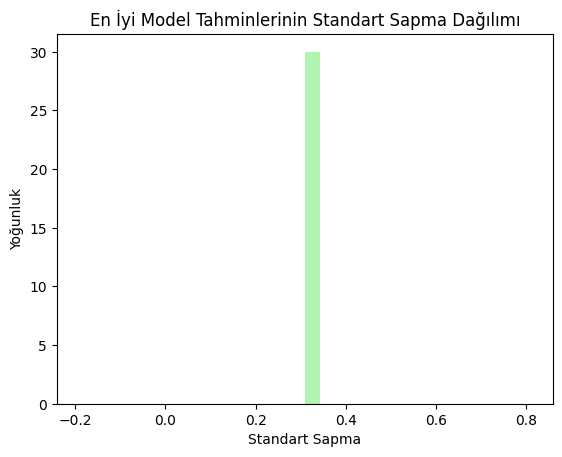

Karar Fonksiyonu: ovo, Kernel: linear, Derece: 3, Doğruluk: 0.7532467532467533
Karışıklık Matrisi:
[[127  24]
 [ 33  47]]
Karar Fonksiyonu: ovo, Kernel: linear, Derece: 5, Doğruluk: 0.7532467532467533
Karışıklık Matrisi:
[[127  24]
 [ 33  47]]
Karar Fonksiyonu: ovo, Kernel: linear, Derece: 7, Doğruluk: 0.7532467532467533
Karışıklık Matrisi:
[[127  24]
 [ 33  47]]
Karar Fonksiyonu: ovo, Kernel: poly, Derece: 3, Doğruluk: 0.7619047619047619
Karışıklık Matrisi:
[[130  21]
 [ 34  46]]
Karar Fonksiyonu: ovo, Kernel: poly, Derece: 5, Doğruluk: 0.7359307359307359
Karışıklık Matrisi:
[[132  19]
 [ 42  38]]
Karar Fonksiyonu: ovo, Kernel: poly, Derece: 7, Doğruluk: 0.7012987012987013
Karışıklık Matrisi:
[[120  31]
 [ 38  42]]
Karar Fonksiyonu: ovo, Kernel: rbf, Derece: 3, Doğruluk: 0.7532467532467533
Karışıklık Matrisi:
[[126  25]
 [ 32  48]]
Karar Fonksiyonu: ovo, Kernel: rbf, Derece: 5, Doğruluk: 0.7532467532467533
Karışıklık Matrisi:
[[126  25]
 [ 32  48]]
Karar Fonksiyonu: ovo, Kernel: rbf, 

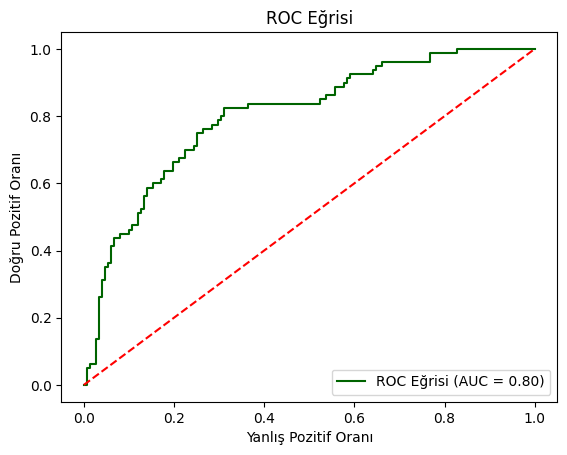

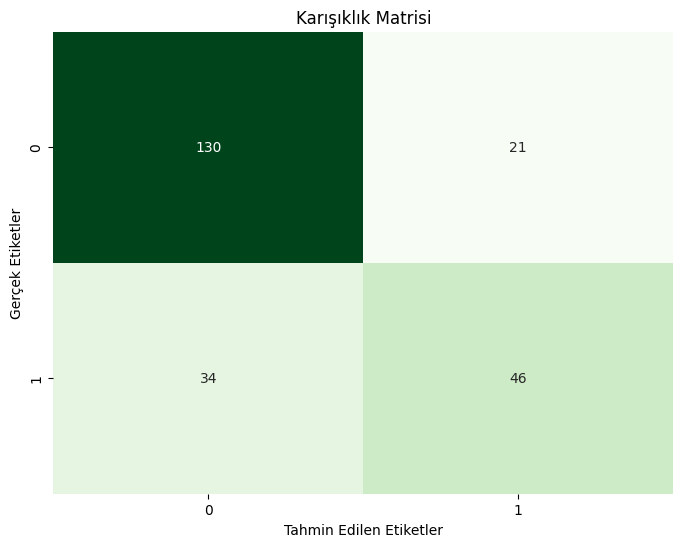

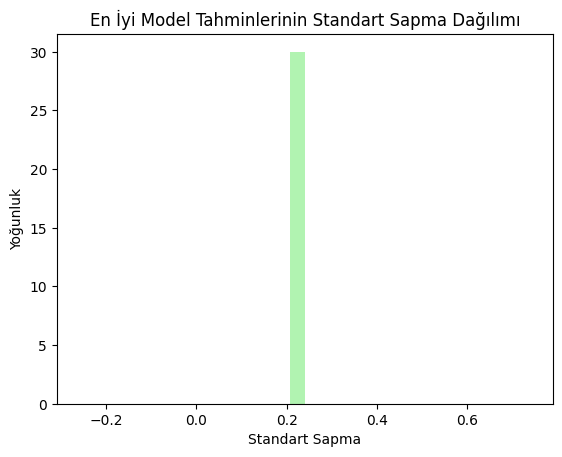

In [ ]:
# MLP (Multi-Layer Perceptron)

# Parametre kombinasyonları
hidden_layer_sizes = [(8,), (16,), (32,), (64,), (128,), (256,)]
activation_functions = ['logistic', 'tanh', 'relu', 'identity']
learning_rates = [0.001, 0.01, 0.1, 0.002, 0.02, 0.2, 0.003, 0.03, 0.3]
batch_sizes = [8, 16, 32, 64, 128, 256]
best_accuracy = 0
best_model_details = {}

for hidden_layers in hidden_layer_sizes:
    for activation in activation_functions:
        for learning_rate in learning_rates:
            for batch_size in batch_sizes:
                mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation,
                                    learning_rate_init=learning_rate, batch_size=batch_size,
                                    max_iter=10000, alpha=0.001, random_state=42)
                mlp.fit(X_train, y_train)
                train_predictions = mlp.predict(X_train)
                test_predictions = mlp.predict(X_test)
                test_accuracy = accuracy_score(y_test, test_predictions)
                train_accuracy = accuracy_score(y_train, train_predictions)

                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_model_details = {
                        'model': mlp,
                        'train_accuracy': train_accuracy,
                        'test_accuracy': test_accuracy,
                        'params': {
                            'hidden_layers': hidden_layers,
                            'activation': activation,
                            'learning_rate': learning_rate,
                            'batch_size': batch_size
                        }
                    }

# Performans metrikleri
probas = best_model_details['model'].predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probas)
mse = mean_squared_error(y_test, test_predictions)
report = classification_report(y_test, test_predictions)
cm = confusion_matrix(y_test, test_predictions)
fpr, tpr, _ = roc_curve(y_test, probas)

# Model detaylarının yazdırılması
print(f"En İyi Model Parametreleri: {best_model_details['params']}")
print(f"Train Doğruluğu: {best_model_details['train_accuracy']:.2f}")
print(f"Test Doğruluğu: {best_model_details['test_accuracy']:.2f}")
print("Sınıflandırma Raporu:")
print(report)
print(f"Ortalama Kare Hata: {mse:.2f}")
print("Confusion Matrix:")
print(cm)

# Karışıklık Matrisi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Karışıklık Matrisi')
plt.show()

# ROC Eğrisi
plt.figure()
plt.plot(fpr, tpr, color='darkgreen', label='ROC Eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

# Standart Sapma Grafiği
std_devs = np.std(probas, axis=0)
plt.figure()
plt.hist(std_devs, bins=30, density=True, color='lightgreen', alpha=0.7)
plt.title('En İyi Model Tahminlerinin Standart Sapma Dağılımı')
plt.xlabel('Standart Sapma')
plt.ylabel('Yoğunluk')
plt.show()



SVM

Karar Fonksiyonu: ovo, Kernel: linear, Derece: 3, Doğruluk: 0.7532467532467533
Karışıklık Matrisi:
[[127  24]
 [ 33  47]]
Karar Fonksiyonu: ovo, Kernel: linear, Derece: 5, Doğruluk: 0.7532467532467533
Karışıklık Matrisi:
[[127  24]
 [ 33  47]]
Karar Fonksiyonu: ovo, Kernel: linear, Derece: 7, Doğruluk: 0.7532467532467533
Karışıklık Matrisi:
[[127  24]
 [ 33  47]]
Karar Fonksiyonu: ovo, Kernel: poly, Derece: 3, Doğruluk: 0.7619047619047619
Karışıklık Matrisi:
[[130  21]
 [ 34  46]]
Karar Fonksiyonu: ovo, Kernel: poly, Derece: 5, Doğruluk: 0.7359307359307359
Karışıklık Matrisi:
[[132  19]
 [ 42  38]]
Karar Fonksiyonu: ovo, Kernel: poly, Derece: 7, Doğruluk: 0.7012987012987013
Karışıklık Matrisi:
[[120  31]
 [ 38  42]]
Karar Fonksiyonu: ovo, Kernel: rbf, Derece: 3, Doğruluk: 0.7532467532467533
Karışıklık Matrisi:
[[126  25]
 [ 32  48]]
Karar Fonksiyonu: ovo, Kernel: rbf, Derece: 5, Doğruluk: 0.7532467532467533
Karışıklık Matrisi:
[[126  25]
 [ 32  48]]
Karar Fonksiyonu: ovo, Kernel: rbf, 

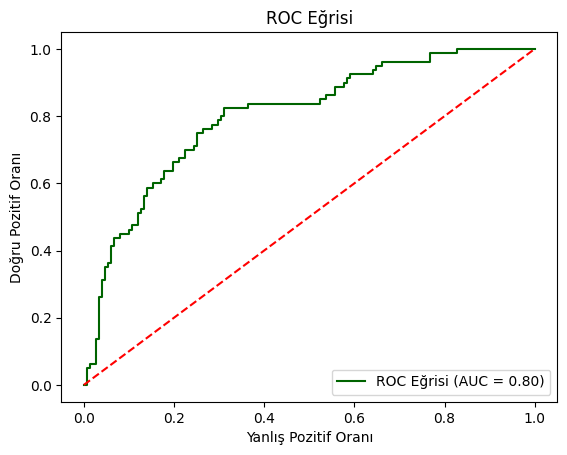

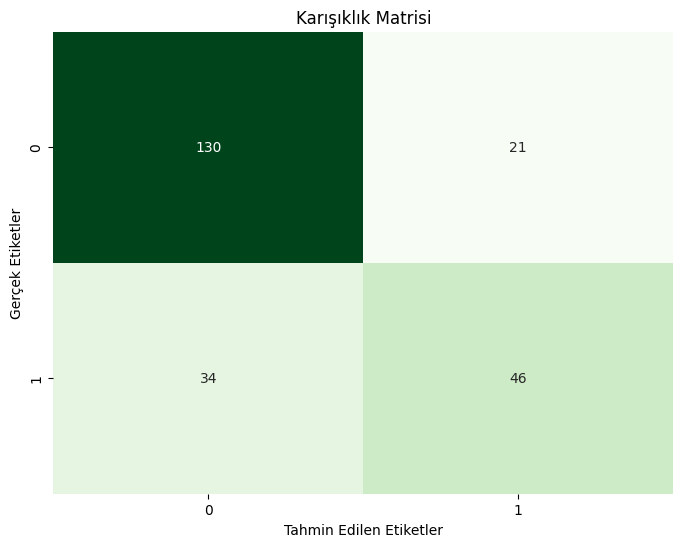

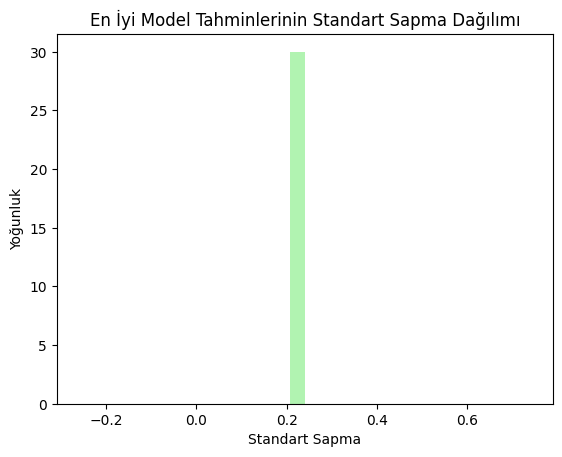

In [ ]:
# SVC (Support Vector Classifier)

# Değerlendirme için değişkenler
best_accuracy = 0
best_params = {}

# 'ovo' ve 'ovr' için döngüler
for decision_function_shape in ['ovo', 'ovr']:
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        for degree in [3, 5, 7]:
            model = SVC(kernel=kernel, degree=degree if kernel == 'poly' else 3, decision_function_shape=decision_function_shape, random_state=42, probability=True)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'kernel': kernel, 'degree': degree, 'decision_function_shape': decision_function_shape, 'model': model}

            # Sonuçları yazdırma
            print(f"Karar Fonksiyonu: {decision_function_shape}, Kernel: {kernel}, Derece: {degree}, Doğruluk: {accuracy}")
            cm = confusion_matrix(y_test, y_pred)
            print("Karışıklık Matrisi:")
            print(cm)

# En iyi modelin detaylarını yazdırma
best_model = best_params['model']
y_pred = best_model.predict(X_test)
probas = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probas)
mse = mean_squared_error(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, probas)

print("\nEn İyi Model Parametreleri:")
print(best_params)
print(f"Train Doğruluğu: {best_model.score(X_train, y_train):.2f}")
print(f"Test Doğruluğu: {best_accuracy:.2f}")
print("Sınıflandırma Raporu:")
print(report)
print(f"Ortalama Kare Hata: {mse:.2f}")
print("Karışıklık Matrisi:")
print(cm)

# ROC Eğrisi çizdirme
plt.figure()
plt.plot(fpr, tpr, color='darkgreen', label='ROC Eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

# Karışıklık Matrisi çizdirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Karışıklık Matrisi')
plt.show()

# Karar sınırı
if X_train.shape[1] == 2:  # Eğer veri seti 2 boyutlu ise
    X_min, X_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='Greens')
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k')
    plt.xlabel('Özellik 1')
    plt.ylabel('Özellik 2')
    plt.title('En İyi Modelin Karar Sınırı')
    plt.show()

# Standart sapma grafiği
std_dev = np.std(probas)
plt.figure()
plt.hist(std_dev, bins=30, density=True, color='lightgreen', alpha=0.7)
plt.title('En İyi Model Tahminlerinin Standart Sapma Dağılımı')
plt.xlabel('Standart Sapma')
plt.ylabel('Yoğunluk')
plt.show()